## COMPARE VECTORS

In [1]:
from models.inceptionResnetV1 import * 
import numpy as np 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import os
from PIL import Image
from serverFunc import *
from featureExtraction import *

## COMPARE DATABASE
---

In [5]:
# Import dependencies
image = Image.open('../data/mariano_pareja/mariano00003.jpg')

image = [image]
mar_embedded = extractFeatVectors(image)
mar_embedded = np.squeeze(mar_embedded)

In [6]:
save_path = './Database/embeddeds/'

test_vector = mar_embedded

data = {"Mariano Pareja": test_vector.tolist()}

# Save the data
with open(os.path.join(save_path, "marianopareja.json"), 'w') as json_file: 
    json.dump(data, json_file)

In [7]:
with open(os.path.join(save_path, "marianopareja.json"), 'r') as json_file: 
    data = json.load(json_file)

In [8]:
nombre = list(data.keys())[0]

embedded = np.array(data[nombre])

In [ ]:
def compareDatabase(ftVectors): 
    """
    Compare the similarity between an input image and pre-processed vectores in the database
    Args: 
        ftVectors: List containing np.array()
        mode: 1: Cosine Distance, 2: Euclidian Distance
    Ouputs:
        identity{List}: List containing the names of the students
    """
    THRESHOLD = 0.2

    if not len(ftVectors > 0): 
        return []
    
    # Path to the database 
    db_embeddeds_path = './Database/embeddeds'

    # Initialize empty list
    identity = []
    
    for embedded in os.listdir(db_embeddeds_path): 
        file_path = os.path.join(db_embeddeds_path, embedded)
        with open(file_path, 'r') as json_file: 
            data = json.load(json_file)

            # Extract student name
            student_name = list(data.keys())[0]
            # Extract anchor embedded
            anchor_embeded = np.array(data[student_name])
            distances = [cosineDistance(anchor_embeded, ftVector) for ftVector in ftVectors]
        
        # Append the name to the list
        if max(distances) < THRESHOLD: 
            identity.append(student_name)
    
    return identity


In [ ]:
list_students = compareDatabase(embeddeds)

print(type(list_students))

<class 'list'>


## COMPARE DISTANCES TO ANCHOR EMBEDDED
---

In [10]:
# Create anchor embedded 
anchor_img = Image.open('../data/anchorImages/mariano_pareja.jpg')

img = []
img.append(anchor_img)

# Create an anchor image to calculate distances
anchor_embd = extractFeatVectors(img)
anchor_embd = np.squeeze(anchor_embd)

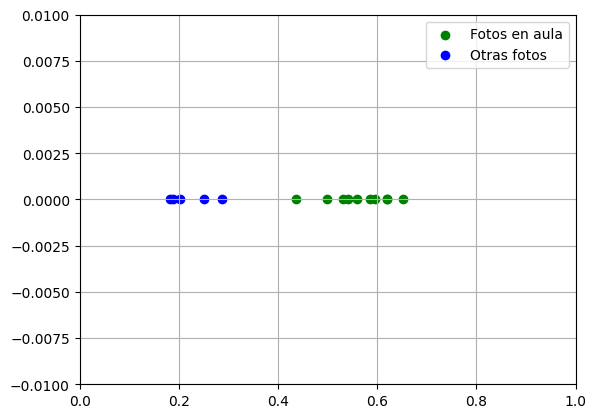

In [15]:
# Classroom photos
# -------------------------------------
class_img = []

indexes = os.listdir('../data/mariano_pareja/classroom/')

for i in range(10):
    image = Image.open('../data/mariano_pareja/classroom/' + indexes[i] )
    class_img.append(image)

class_emb = extractFeatVectors(class_img)
class_dist = [cosineDistance(anchor_embd, embd) for embd in class_emb]

# Other Photos 
# -------------------------------------
other_img = []

for image in os.listdir('../data/mariano_pareja/Otros/'):
    other_img.append(Image.open('../data/mariano_pareja/Otros/' + image))

other_emb = extractFeatVectors(other_img)
other_dist = [cosineDistance(anchor_embd, embd) for embd in other_emb]

# Visualize the data
# -------------------------------------
fig, ax = plt.subplots()
ax.scatter(class_dist, [0] * len(class_dist), color='green', label='Fotos en aula')
ax.scatter(other_dist, [0] * len(other_dist), color='blue', label='Otras fotos')

ax.set_xlim(0, 1)
ax.set_ylim(-0.01, 0.01)
ax.legend()
ax.grid()

plt.show()


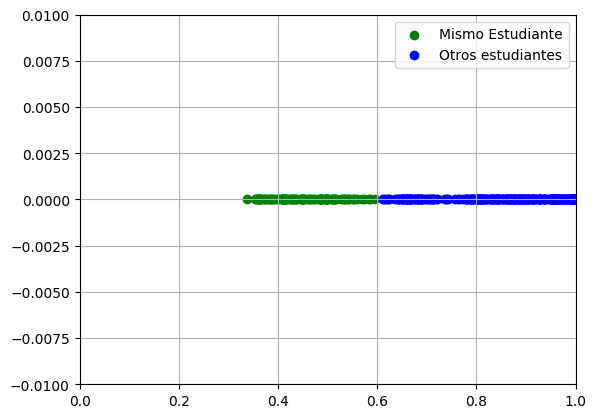

In [ ]:
# Extract mine vetors
mip_img = []

for image in os.listdir('../data/mariano_pareja/classroom/'):
    mip_img.append(Image.open('../data/mariano_pareja/classroom/' + image))

mip_emb = extractFeatVectors(mip_img)
mip_dist = [cosineDistance(anchor_embd, embd) for embd in mip_emb]

# Extract other vectores
others_img = []
others_emb = []

for image in os.listdir('../data/facesDataset/'):
    others_img.append(Image.open('../data/facesDataset/' + image))


step = int(len(others_img) / 6)

for i in range(1):
    # lower_range = step*i
    # upper_limit = (step * (i+1)) - 1

    lower_limit = step*i
    upper_limit = (step * (i+1)) - 1

    aux_list = others_img[lower_limit: upper_limit]
    aux_emb = extractFeatVectors(aux_list)
    others_emb.extend(aux_emb)

others_dist = [cosineDistance(anchor_embd, embd) for embd in others_emb]

# Visualize the data
# -------------------------------------
fig, ax = plt.subplots()
ax.scatter(mip_dist, [0] * len(mip_dist), color='green', label='Mismo Estudiante')
ax.scatter(others_dist, [0] * len(others_dist), color='blue', label='Otros estudiantes')

ax.set_xlim(0, 1)
ax.set_ylim(-0.01, 0.01)
ax.legend()
ax.grid()

plt.show()

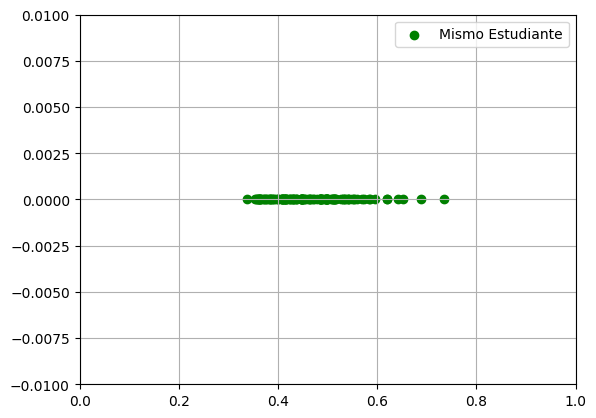

In [ ]:
fig, ax = plt.subplots()
ax.scatter(mip_dist, [0] * len(mip_dist), color='green', label='Mismo Estudiante')

ax.set_xlim(0, 1)
ax.set_ylim(-0.01, 0.01)
ax.legend()
ax.grid()

plt.show()

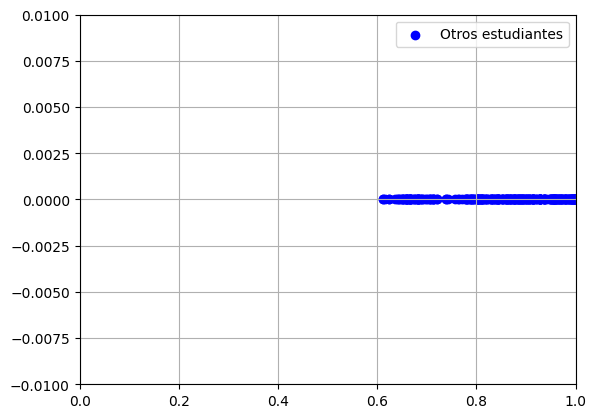

In [ ]:
fig, ax = plt.subplots()
ax.scatter(others_dist, [0] * len(others_dist), color='blue', label='Otros estudiantes')

ax.set_xlim(0, 1)
ax.set_ylim(-0.01, 0.01)
ax.legend()
ax.grid()

plt.show()

## CONFUSION MATRIX
---

In [ ]:
import sys 
sys.path.append('../jetsonNano/')

from jetsonFunc import *
from preprocessData import *
from featureExtraction import * 

In [ ]:
for name in os.listdir('../data/classroomUCB_cellphone/'):
    print(name)

min = 233
max = 340

y_pred = []

for img in os.listdir('../data/classroomUCB_cellphone/'):
    image = Image.open(r'../data/classroomUCB_cellphone/' + img)

    preImg = MTCNN_preprocessing(image)
    faces = detectFaces(preImg)
    facialPtos = getFacialPtos(faces)
    alignFaces = alignAllFaces(image, facialPtos, None, (160,160))
    embeddeds = extractFeatVectors(alignFaces)
    identity = compareDatabase(embeddeds)

    if len(identity) > 0:
        y_pred.append(1)
    else: 
        y_pred.append(0) 


classroom0000.jpg
classroom0001.jpg
classroom0002.jpg
classroom0003.jpg
classroom0004.jpg
classroom0005.jpg
classroom0006.jpg
classroom0007.jpg
classroom0008.jpg
classroom0009.jpg
classroom0010.jpg
classroom0011.jpg
classroom0012.jpg
classroom0013.jpg
classroom0014.jpg
classroom0015.jpg
classroom0016.jpg
classroom0017.jpg
classroom0018.jpg
classroom0019.jpg
classroom0020.jpg
classroom0021.jpg
classroom0022.jpg
classroom0023.jpg
classroom0024.jpg
classroom0025.jpg
classroom0026.jpg
classroom0027.jpg
classroom0028.jpg
classroom0029.jpg
classroom0030.jpg
classroom0031.jpg
classroom0032.jpg
classroom0033.jpg
classroom0034.jpg
classroom0035.jpg
classroom0036.jpg
classroom0037.jpg
classroom0038.jpg
classroom0039.jpg
classroom0040.jpg
classroom0041.jpg
classroom0042.jpg
classroom0043.jpg
classroom0044.jpg
classroom0045.jpg
classroom0046.jpg
classroom0047.jpg
classroom0048.jpg
classroom0049.jpg
classroom0050.jpg
classroom0051.jpg
classroom0052.jpg
classroom0053.jpg
classroom0054.jpg
classroom0

341
341


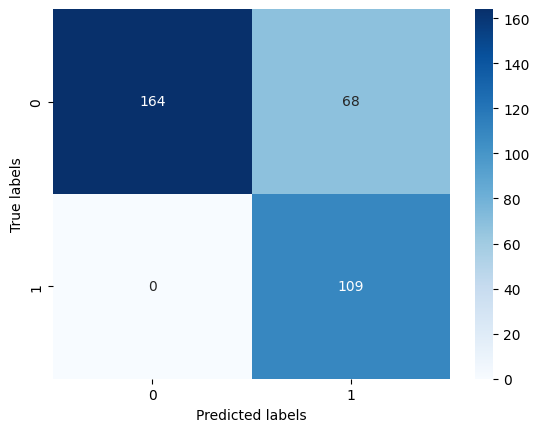

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Datos de ejemplo
y_true = [0] * 232 + [1] * (341 - 232)
print(len(y_true))
print(len(y_pred))

# Crear matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Crear heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Configurar etiquetas de los ejes
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Mostrar el gráfico
plt.show()

In [ ]:
import csv

# Nombre del archivo CSV de salida
nombre_archivo = "y_pred.csv"

# Escribir la lista en el archivo CSV
with open(nombre_archivo, 'w', newline='') as archivo_csv:
    writer = csv.writer(archivo_csv)
    writer.writerow(['y_pred'])
    writer.writerows(zip(y_pred))
